<a href="https://colab.research.google.com/github/UKashNK/Chicago-Crime-Forecast/blob/main/Ukasha_Katende_Chicago_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chicago Crime

Author:Ukasha Katende

##Loading data and processing

In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob


#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'


In [2]:
#loading data
url="/content/drive/MyDrive/CodingDojo/04-DataViz/Week13/Data/Data"
all_files=glob.glob(url + "/*.csv")

file_list=[]
for filename in all_files:
  df=pd.read_csv(filename)
  #setting date to datetime

  df["Datetime"]=pd.to_datetime(df["Date"],format="%m/%d/%Y %I:%M:%S %p")
  #Setting Datetime as Index
  df.drop(columns=["Date"],inplace=True)
  df.set_index("Datetime",inplace=True)
  file_list.append(df)

df=pd.concat(file_list,axis=0,ignore_index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7713109 entries, 2001-01-01 01:00:00 to 2008-12-31 00:59:16
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 603.2+ MB


In [3]:
#df.drop(columns=["ID","Latitude","Longitude","Location Description","Description","Arrest","Domestic","Beat","Ward"],inplace=True)
df=df.dropna()
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Datetime,,,,,,,,,,,
2001-01-01 01:00:00,5462733,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849
2001-01-01 13:00:00,6808288,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.0,3.0,41.822551,-87.615632
2001-01-01 13:00:00,3769790,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.0,34.0,41.673171,-87.638000
2001-01-01 01:00:00,3212105,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,913,9.0,14.0,41.823730,-87.698440
2001-01-01 01:00:00,3206463,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835,8.0,18.0,41.735507,-87.690095


In [4]:
#Processing non uniform data and creating resampled crime counts version
crime_list=df["Primary Type"].unique()
CRIMES={}

for crime in crime_list:
  temp=df.loc[df["Primary Type"]==crime].copy()
  temp_res=temp.resample("D").size()
  CRIMES[crime]=temp_res.copy()

df_counts=pd.DataFrame(CRIMES)

In [5]:
df_counts=df_counts.fillna(0)
df_counts

,OFFENSE INVOLVING CHILDREN,THEFT,CRIM SEXUAL ASSAULT,SEX OFFENSE,HOMICIDE,MOTOR VEHICLE THEFT,OTHER OFFENSE,DECEPTIVE PRACTICE,BURGLARY,NARCOTICS,...,STALKING,OBSCENITY,PUBLIC INDECENCY,OTHER NARCOTIC VIOLATION,RITUALISM,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),HUMAN TRAFFICKING,NON - CRIMINAL,CONCEALED CARRY LICENSE VIOLATION
Datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-01,66,138,26.0,17,2,3,5,17,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-01-02,0,7,0.0,0,0,1,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-01-03,0,1,0.0,1,0,1,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-01-04,0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-01-05,0,1,0.0,0,0,2,1,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,4,121,0.0,2,0,74,29,18,17.0,8.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-28,2,89,0.0,0,1,98,34,14,21.0,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-12-29,2,115,0.0,1,2,88,29,15,23.0,12.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


##Topics

###Topic 1

Comparing Police Districts

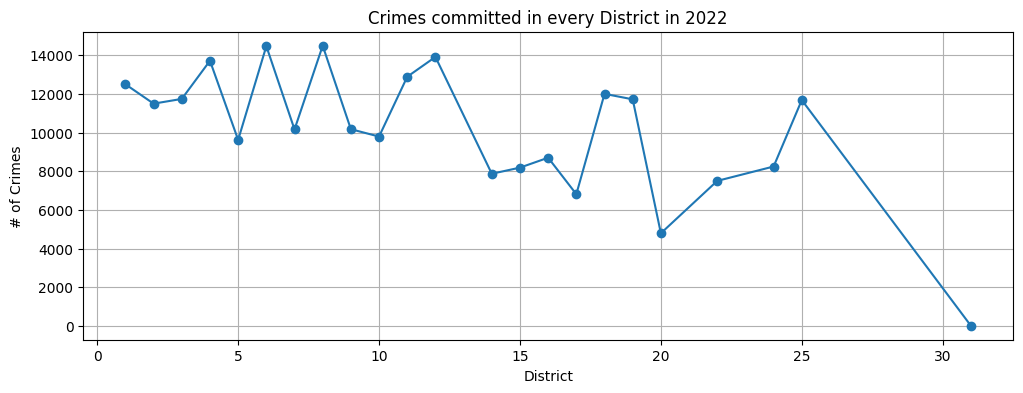

In [ ]:
#Analysis of crimes by month
dist_counts=df.loc["2022"]
dist_counts=dist_counts["District"].value_counts().sort_index()
ax=dist_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='District',title="Crimes committed in every District in 2022");


District 7 and 8 had the most crimes in 2022

District 31 had the least crimes in 2022


###Topic 2

Is the total number of crimes increasing or decreasing across the years

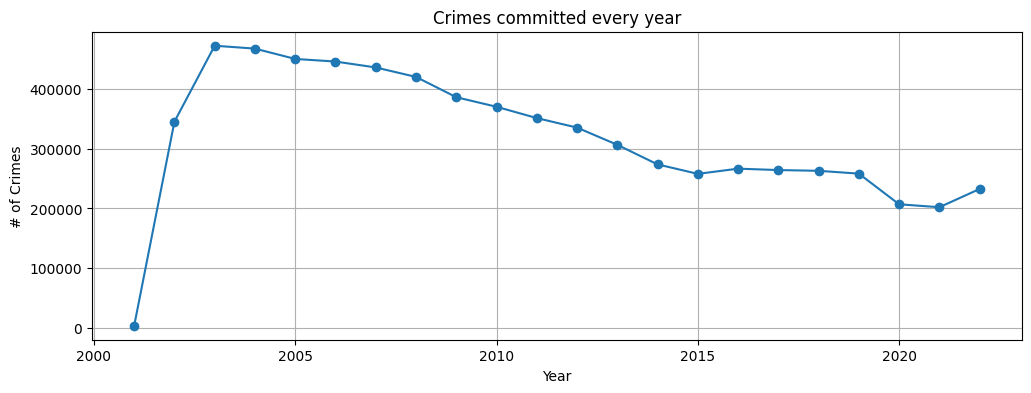

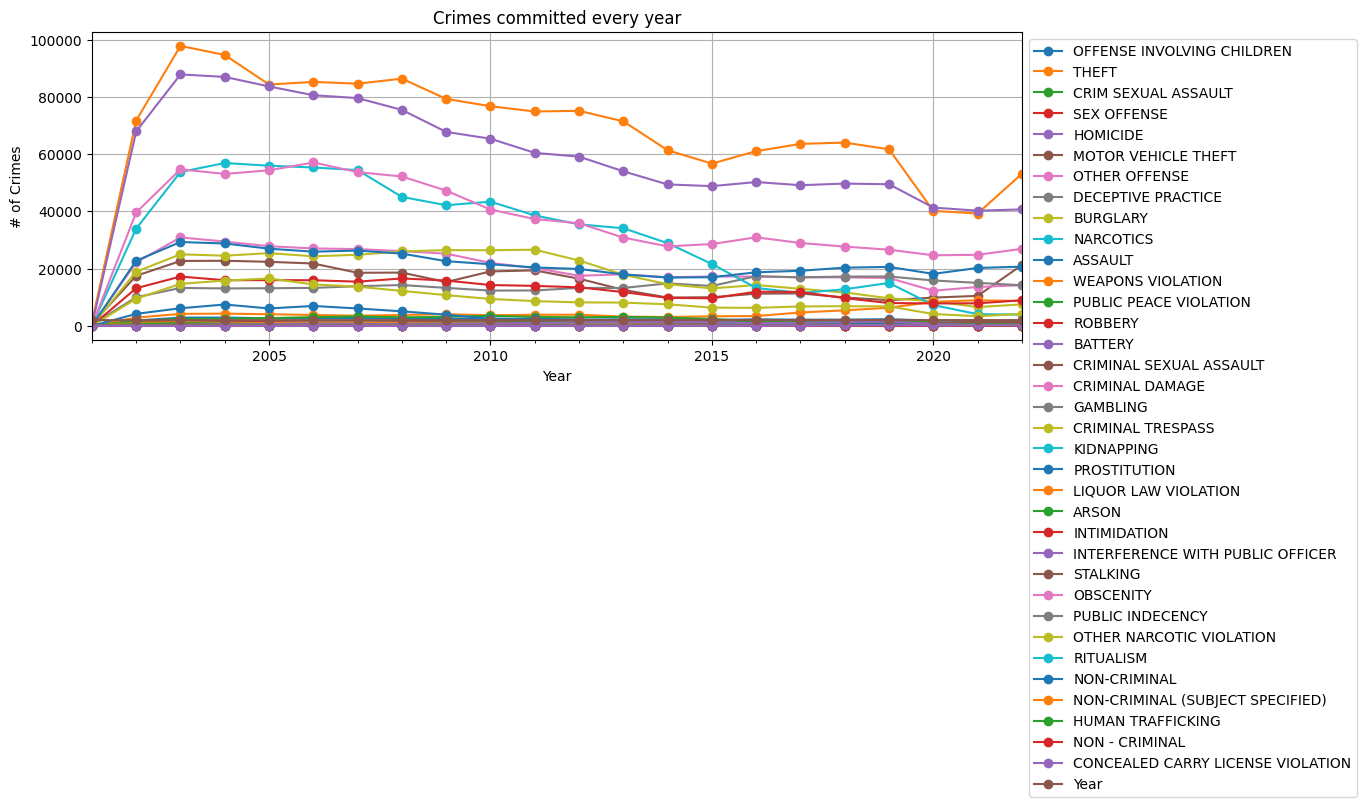

In [ ]:

#Analysis of crimes by Year
df["Year"]=df.index.year
year_counts=df["Year"].value_counts().sort_index()

df_year=df_counts.resample("Y").sum()
df_year["Year"]=df_year.index.year

fig,ax=plt.subplots()
year_counts.plot(style="o-",ylabel='# of Crimes', xlabel='Year',grid=True,title="Crimes committed every year")
ax=df_year.plot(style="o-",ylabel='# of Crimes', xlabel='Year',grid=True,title="Crimes committed every year")
ax.legend(bbox_to_anchor=[1,1]);



The overall number of crimes is decreasing over the years.

All the other crimes appear to follow the same pattern

###Topic 4

Months with the most and least crime

In [ ]:
#Analysis of crimes by month
df["Month"]=df.index.month
df["MonthName"]=df.index.month_name()

unique_months=df.drop_duplicates(subset=["Month"]).sort_values("Month")
month_lookup=dict(zip(unique_months["Month"],unique_months["MonthName"]))

df_month=df_counts.resample("M").sum()
df_month["Month"]=df_month.index.month
df_month["MonthName"]=df_month.index.month_name()


unique_months=df_month.drop_duplicates(subset=["Month"]).sort_values("Month")


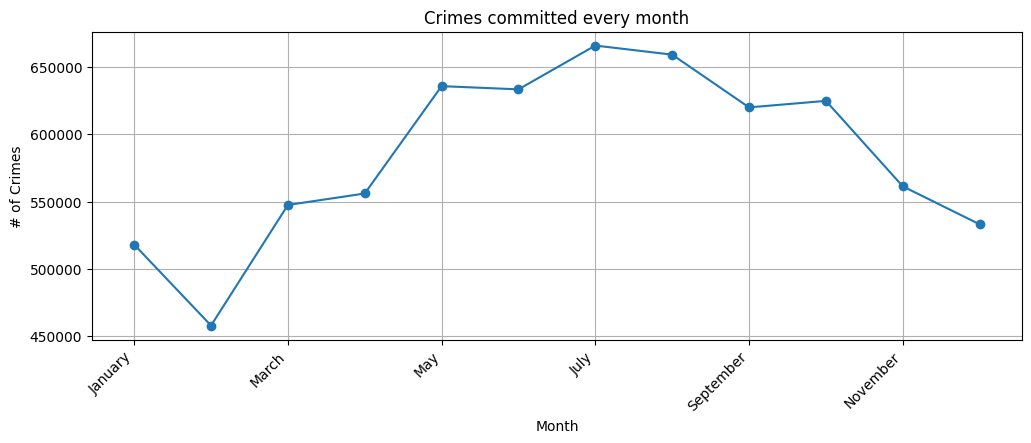

In [ ]:
#plotting the monthly crimes

month_counts = df['MonthName'].value_counts()[month_lookup.values()]

ax = month_counts.plot(style='o-',grid=True,ylabel='# of Crimes',xlabel='Month');
ax.set(title="Crimes committed every month");
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');





July and August have the most crimes
February has the least crimes

##Crime comparison

### modules and custom functions

In [10]:
#timeseries modules
!pip install pmdarima
import pmdarima as pm
import itertools
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import statsmodels.tsa.api as tsa
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import ndiffs,nsdiffs


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.2 MB/s eta 0:00:00


In [11]:
def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

In [12]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d,
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags,
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [13]:
def get_sig_lags(ts, type='ACF',  nlags=None,alpha=0.5):


    if type == 'ACF':
        # Running the function used by plot_acf
        corr_values, conf_int = tsa.stattools.acf(ts, alpha=alpha, nlags=nlags)

    elif type=='PACF':
        corr_values, conf_int = tsa.stattools.pacf(ts, alpha=alpha, nlags=nlags)

    else:
        raise Exception("type must be either 'ACF' or 'PACF'")

    # Determine lags
    lags =range(len(corr_values))

    # Create a centered version of the acf_df
    corr_df = pd.DataFrame({type:corr_values,
                            'Lags':lags,
                            'lower ci': conf_int[:,0]-corr_values, # subtract acf from lower ci to center
                            'upper ci': conf_int[:,1]-corr_values, # subtact acf to upper ci to center
                                 })
    corr_df = corr_df.set_index("Lags")

    # Getting filter for sig lags
    filter_sig_lags = (corr_df[type] < corr_df['lower ci']) | (corr_df[type] > corr_df['upper ci'])

    # Get lag #'s
    sig_lags= corr_df.index[filter_sig_lags]
    sig_lags = sig_lags[sig_lags!=0]

    return sig_lags

In [14]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5),
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},
                  annotate_seas=False, m = None,
                 seas_color='black'):

    fig, axes = plt.subplots(nrows=2, figsize=figsize)

    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')
    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)

    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )
    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)

    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)

    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")
        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m
        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)

        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")
    fig.tight_layout()

    return fig

In [15]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None,
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)
    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)

    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)
    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")
    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index,
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)
    # set the title and add legend
    ax.set_title(title)
    ax.legend();

    return fig, ax

### Theft

In [86]:
#loading data for theft
ts_theft=df_counts.loc[:,["THEFT"]].copy()
ts_theft=ts_theft.resample("M").sum()
ts_theft=ts_theft.fillna(0)
ts_theft

,THEFT
Datetime,
2001-01-31,184
2001-02-28,49
2001-03-31,55
2001-04-30,75
2001-05-31,78
...,...
2022-08-31,5145
2022-09-30,5014
2022-10-31,5123


#### Seasonality

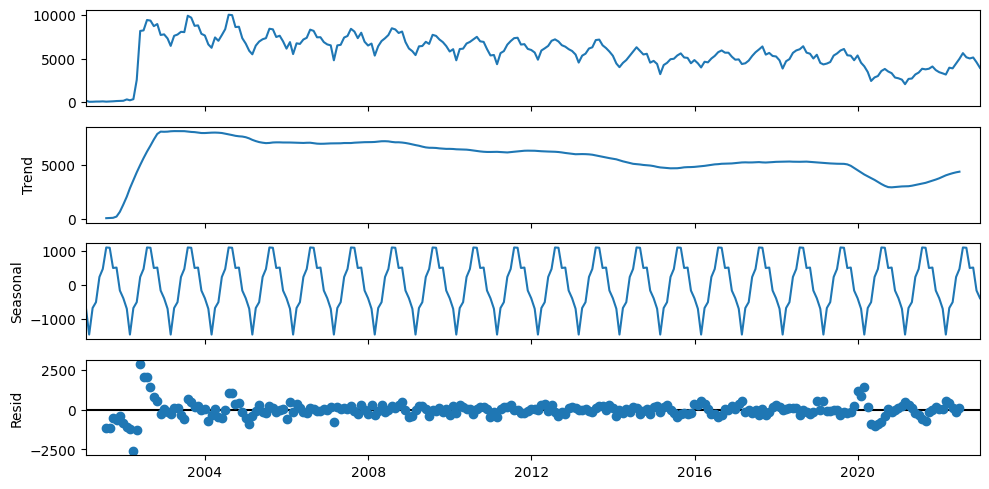

In [87]:
#Decomposing and checking for seasonality
decomp = tsa.seasonal_decompose(ts_theft)
fig = decomp.plot()
fig.set_size_inches(10,5)
fig.tight_layout()

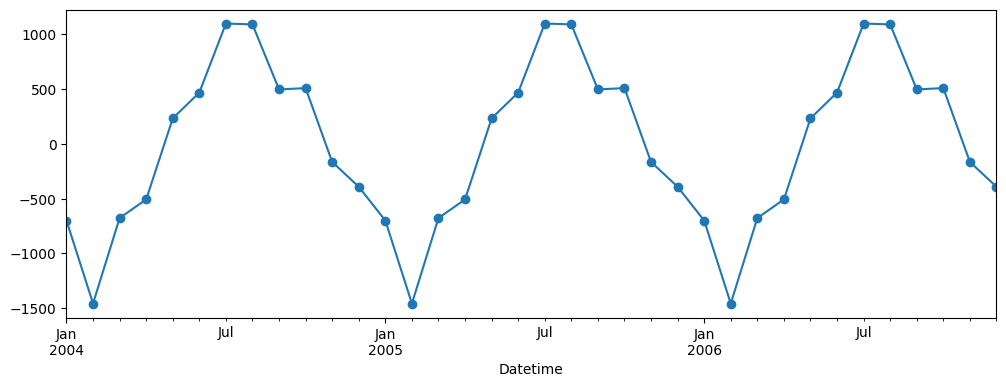

In [88]:
#investigating seasonal component
seasonal=decomp.seasonal
ax=seasonal.loc["2004":"2006"].plot(marker="o")


#### stationality and differencing

In [89]:
#checking for stationality
get_adfuller_results(ts_theft)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-4.926549,14,249,0.000031,0.05,True


In [90]:
D=nsdiffs(ts_theft,m=12)
print(f"D={D}")
d=ndiffs(ts_theft)
print(f"d={d}")

D=0
d=1


<Axes: xlabel='Datetime'>

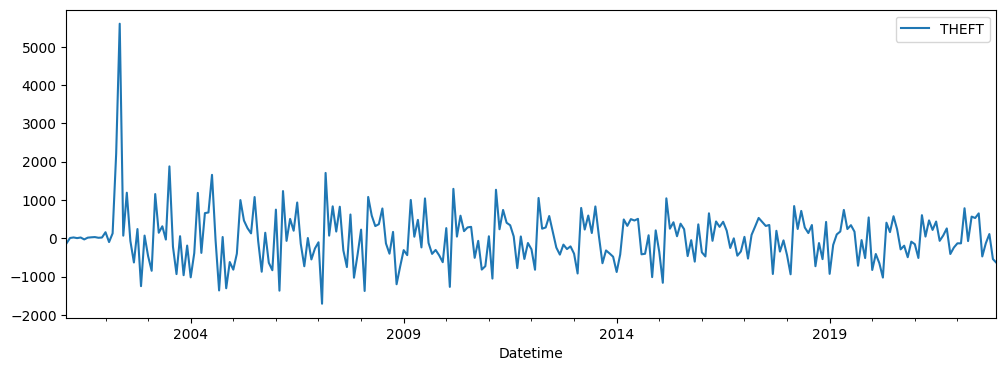

In [91]:
#differencing
ts_theft_diff=ts_theft.diff().dropna()
ts_theft_diff.plot()

####Time series analysis

Conclusion: Models appear identical but the **manual model** has better metric values like R² and MAPE

##### acf and pacf plots

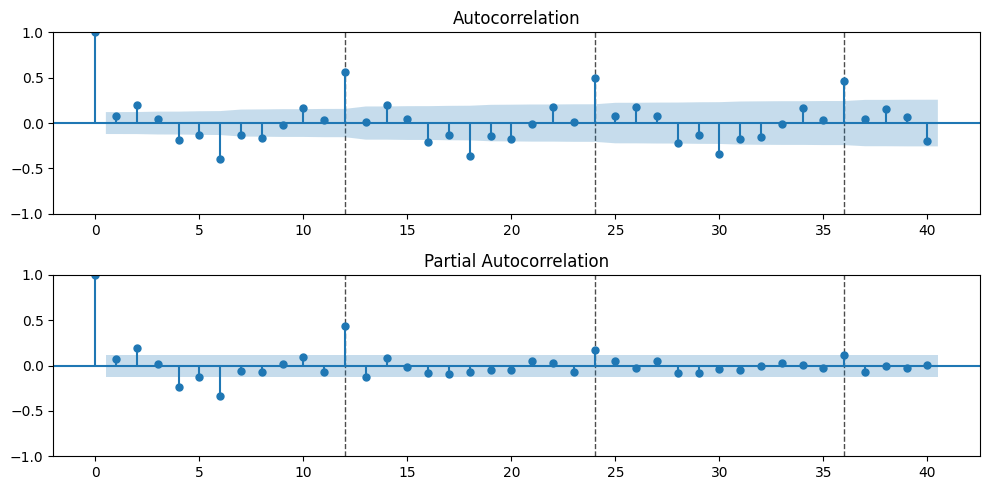

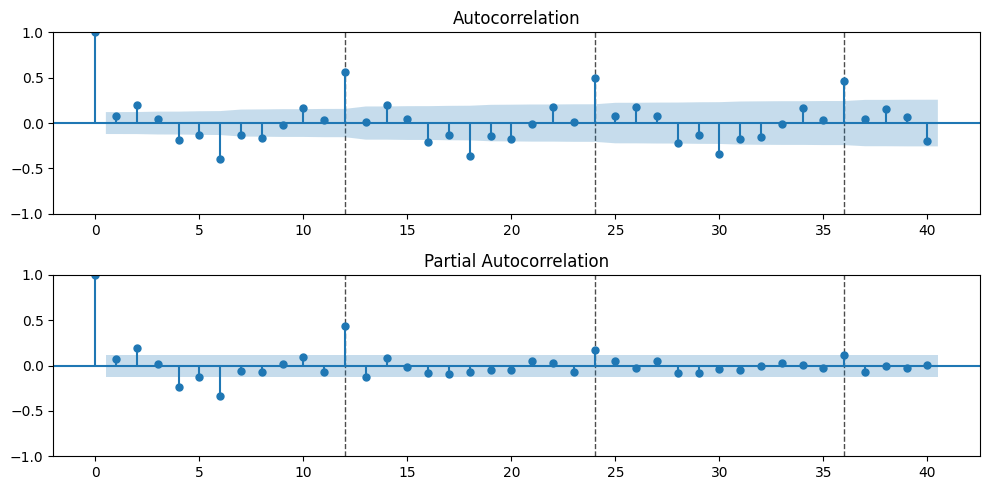

In [92]:
plot_acf_pacf(ts_theft_diff,annotate_seas=True,m=12)

##### manual model

In [93]:
#Train test split
n_test_lags=6
ts_train, ts_test = train_test_split(ts_theft_diff,test_size=n_test_lags)
#Define pdqPDQm components
pdqPDQm = (0,0,1,1,0,1,12)
#define model and fit
sarima=tsa.ARIMA(ts_train,order=pdqPDQm[:3],seasonal_order=pdqPDQm[3:]).fit()

------------------------------------------------------------
Regression Metrics: Theft
------------------------------------------------------------
- MAE = 316.946
- MSE = 147,128.314
- RMSE = 383.573
- R^2 = 0.269
- MAPE = 91.22%


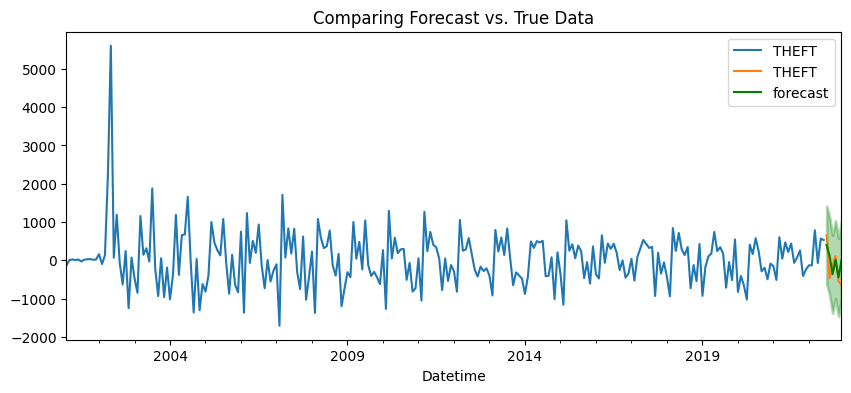

In [94]:
#get forecast
forecast_df = sarima.get_forecast(steps=len(ts_test)).summary_frame()
plot_forecast(ts_train, ts_test, forecast_df)
regression_metrics_ts(ts_test, forecast_df['mean'], label="Theft")

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                            THEFT   No. Observations:                  257
Model:             ARIMA(0, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -1977.517
Date:                          Wed, 08 May 2024   AIC                           3965.034
Time:                                  10:41:17   BIC                           3982.779
Sample:                              02-28-2001   HQIC                          3972.170
                                   - 06-30-2022                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.7012    196.427      0.100      0.920    -365.288     404.690
ma.L1          0.0399      0.065      0.617      0.538      -0.087       0.167
ar.S.L12       0.9741      0.018     53.955      0.000       0.939       1.009
ma.S.L12      -0.7752      0.070    -11.138      0.000      -0.912      -0.639
sigma2      2.686e+05   1.76e+04     15.271      0.000    2.34e+05    3.03e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10861.10
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             3.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

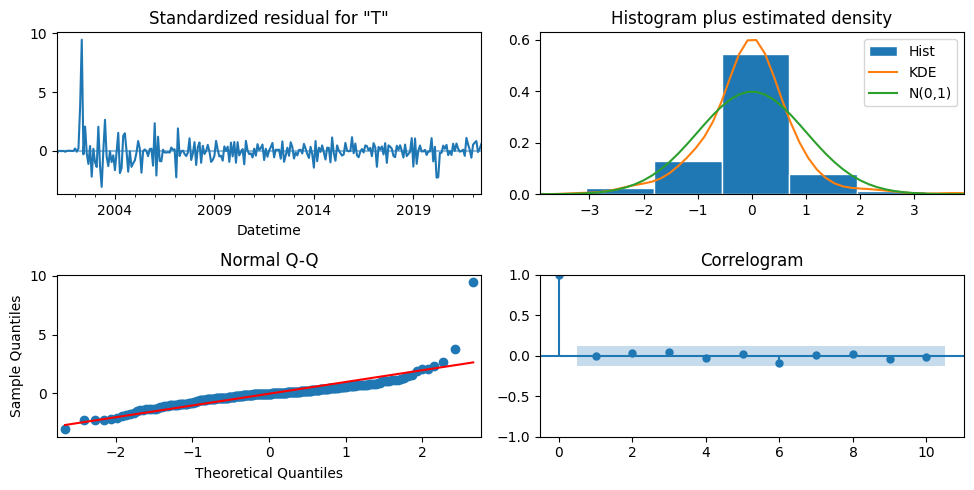

In [95]:
fig=sarima.plot_diagnostics(figsize=(10,5))
fig.tight_layout()
sarima.summary()

In [96]:
theft_model=sarima

##### Automodel

In [97]:
auto_model=pm.auto_arima(ts_train,seasonal=True,m=12)
print(auto_model.order)
print(auto_model.seasonal_order)

(0, 0, 0)
(1, 0, 1, 12)


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(0,0,0)(1,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 703, in fit
    mlefit = super().fit(start_params, method=method,
  File "/usr/local/lib/python3.10/dist-packa

In [98]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                  257
Model:             SARIMAX(1, 0, [1], 12)   Log Likelihood               -1977.716
Date:                    Wed, 08 May 2024   AIC                           3963.432
Time:                            10:42:10   BIC                           3977.628
Sample:                        02-28-2001   HQIC                          3969.141
                             - 06-30-2022                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9724      4.850      0.201      0.841      -8.533      10.477
ar.S.L12       0.9756      0.017     59.025      0.000       0.943       1.008
ma.S.L12      -0.7815      0.066    -11.798      0.000      -0.911      -0.652
sigma2      2.687e+05   1.52e+04     17.729      0.000    2.39e+05    2.98e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):             11993.46
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             3.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

------------------------------------------------------------
Regression Metrics: Theft
------------------------------------------------------------
- MAE = 252.994
- MSE = 102,837.217
- RMSE = 320.682
- R^2 = 0.489
- MAPE = 96.32%


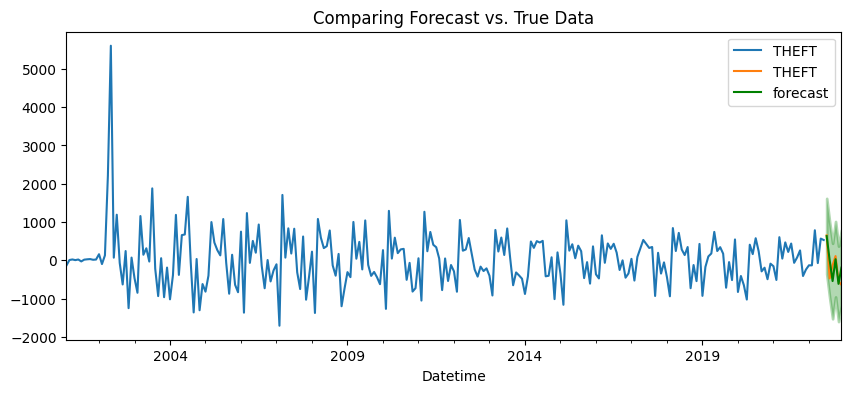

In [99]:
#fit model
auto_model=tsa.ARIMA(ts_train,order=auto_model.order,seasonal_order=auto_model.seasonal_order).fit()
#get forecast
forecast_df = auto_model.get_forecast(steps=len(ts_test)).summary_frame()
plot_forecast(ts_train, ts_test, forecast_df);
regression_metrics_ts(ts_test, forecast_df['mean'], label="Theft");

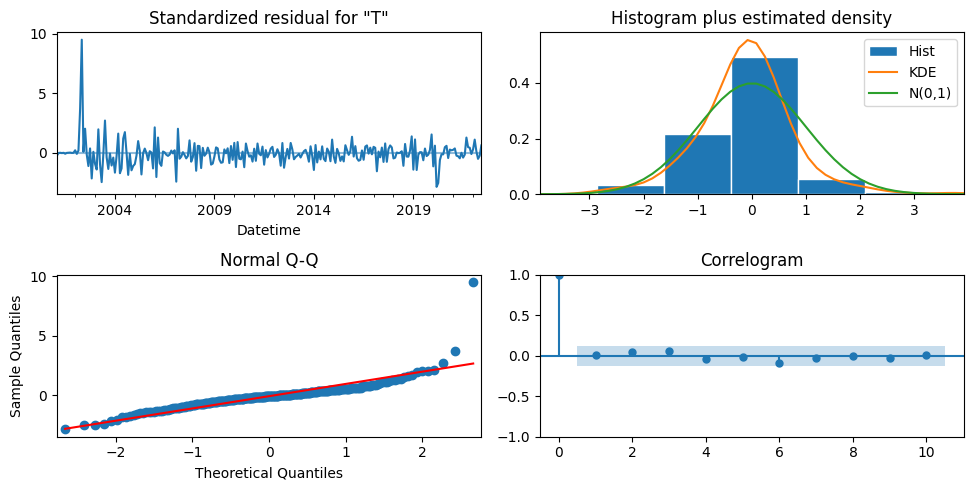

In [100]:
fig=auto_model.plot_diagnostics(figsize=(10,5))
fig.tight_layout()


###Narcotics

In [137]:
#loading data for narcotics
ts_narcotics=df_counts.loc[:,["NARCOTICS"]].copy()
ts_narcotics=ts_narcotics.resample("M").sum()
ts_narcotics=ts_narcotics.fillna(0)
ts_narcotics

,NARCOTICS
Datetime,
2001-01-31,7.0
2001-02-28,22.0
2001-03-31,15.0
2001-04-30,6.0
2001-05-31,4.0
...,...
2022-08-31,326.0
2022-09-30,300.0
2022-10-31,316.0


#### Seasonality

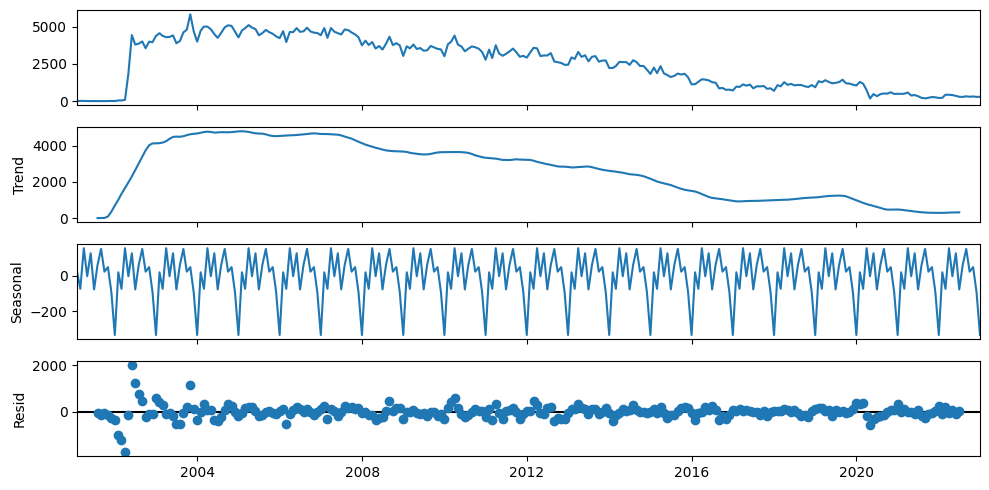

In [138]:
#Decomposing and checking for seasonality
decomp = tsa.seasonal_decompose(ts_narcotics)
fig = decomp.plot()
fig.set_size_inches(10,5)
fig.tight_layout()

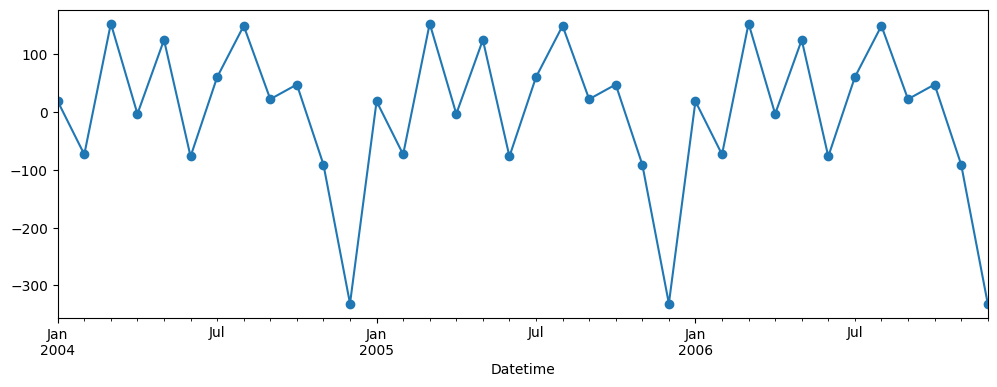

In [139]:
#investigating seasonal component
seasonal=decomp.seasonal
ax=seasonal.loc["2004":"2006"].plot(marker="o")


#### stationality and differencing

In [140]:
#checking for stationality
get_adfuller_results(ts_narcotics)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-1.603177,13,250,0.481998,0.05,False


In [141]:
D=nsdiffs(ts_theft,m=12)
print(f"D={D}")
d=ndiffs(ts_theft)
print(f"d={d}")

D=0
d=1


<Axes: xlabel='Datetime'>

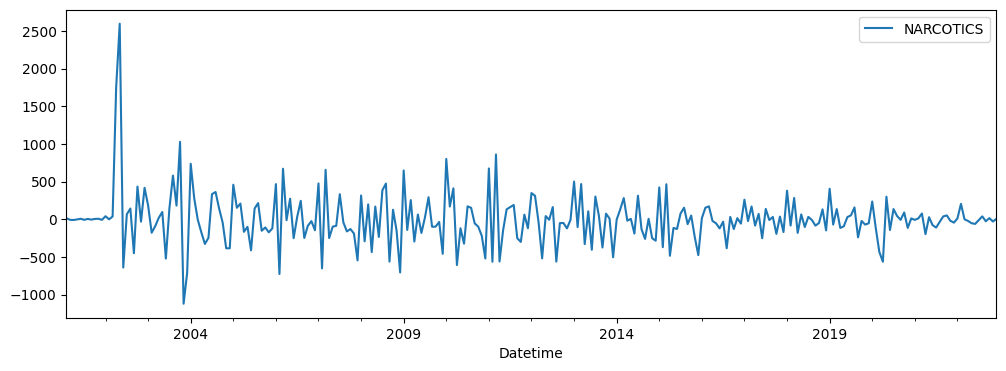

In [142]:
#differencing
ts_narc_diff=ts_narcotics.diff().dropna()
ts_narc_diff.plot()

####Time series analysis

Conclusion: The auto_model has lower BIC, lower AIC and better correlogram fit.

##### acf and pacf plots

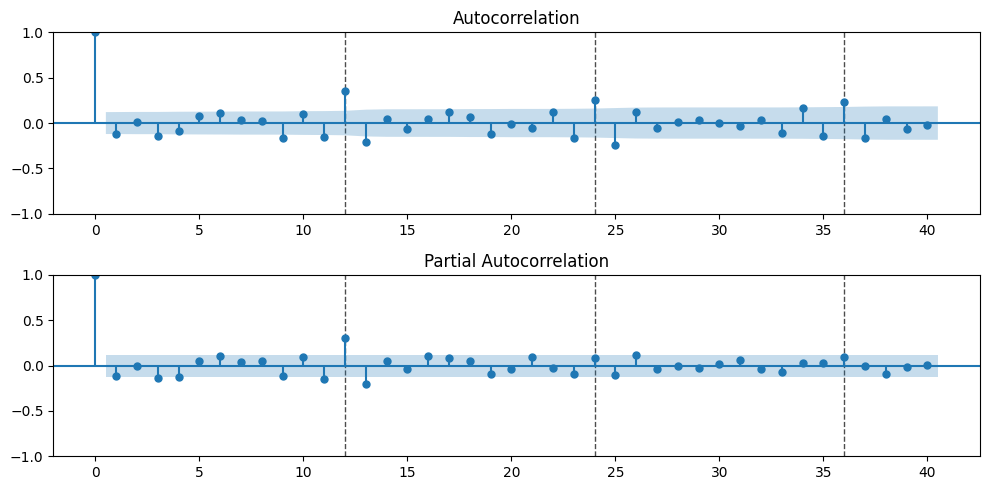

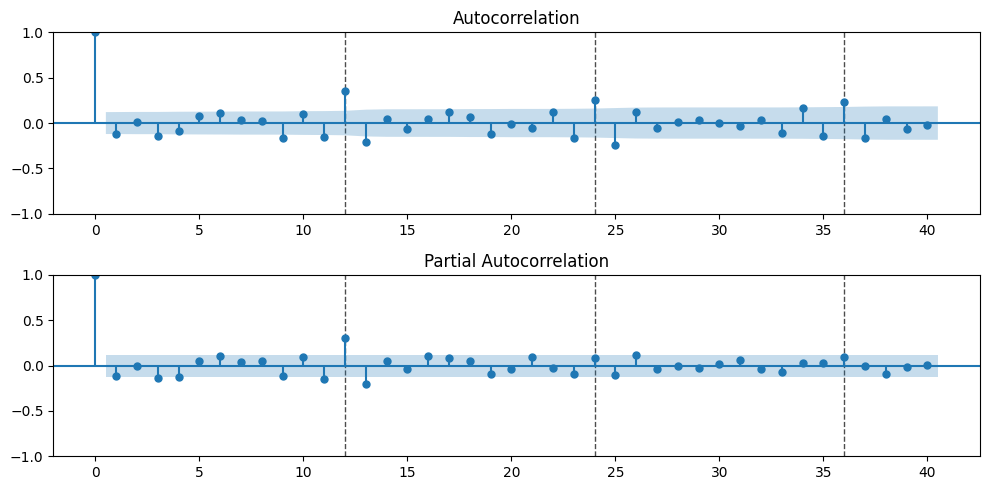

In [143]:
plot_acf_pacf(ts_narc_diff,annotate_seas=True,m=12)

##### first model

In [144]:
#Train test split
n_test_lags=6
ts_train, ts_test = train_test_split(ts_narc_diff,test_size=n_test_lags)
#Define pdqPDQm components
pdqPDQm = (1,1,0,1,0,1,12)
#define model and fit
sarima=tsa.ARIMA(ts_train,order=pdqPDQm[:3],seasonal_order=pdqPDQm[3:]).fit()

------------------------------------------------------------
Regression Metrics: Theft
------------------------------------------------------------
- MAE = 39.580
- MSE = 2,312.560
- RMSE = 48.089
- R^2 = -3.032
- MAPE = 313.19%


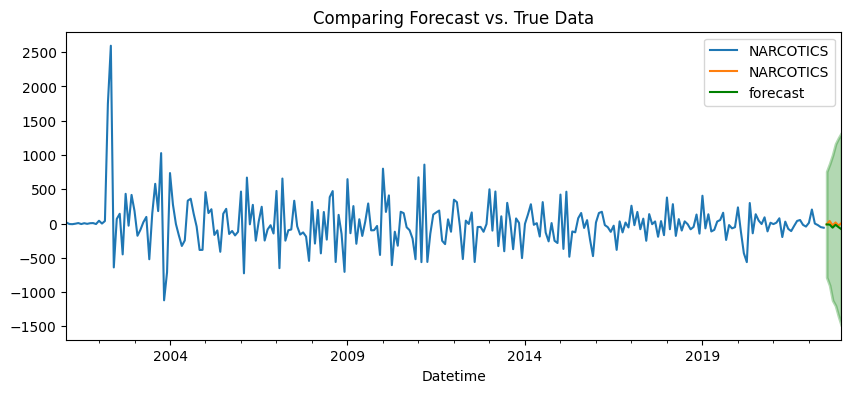

In [145]:
#get forecast
forecast_df = sarima.get_forecast(steps=len(ts_test)).summary_frame()
plot_forecast(ts_train, ts_test, forecast_df)
regression_metrics_ts(ts_test, forecast_df['mean'], label="Theft")

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          NARCOTICS   No. Observations:                  257
Model:             ARIMA(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1895.382
Date:                            Wed, 08 May 2024   AIC                           3798.763
Time:                                    11:27:20   BIC                           3812.944
Sample:                                02-28-2001   HQIC                          3804.467
                                     - 06-30-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4342      0.035    -12.535      0.000      -0.502      -0.366
ar.S.L12       0.9010      0.066     13.557      0.000       0.771       1.031
ma.S.L12      -0.6940      0.123     -5.636      0.000      -0.935      -0.453
sigma2      1.552e+05   7985.179     19.432      0.000     1.4e+05    1.71e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.86   Jarque-Bera (JB):              1592.73
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                            -0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

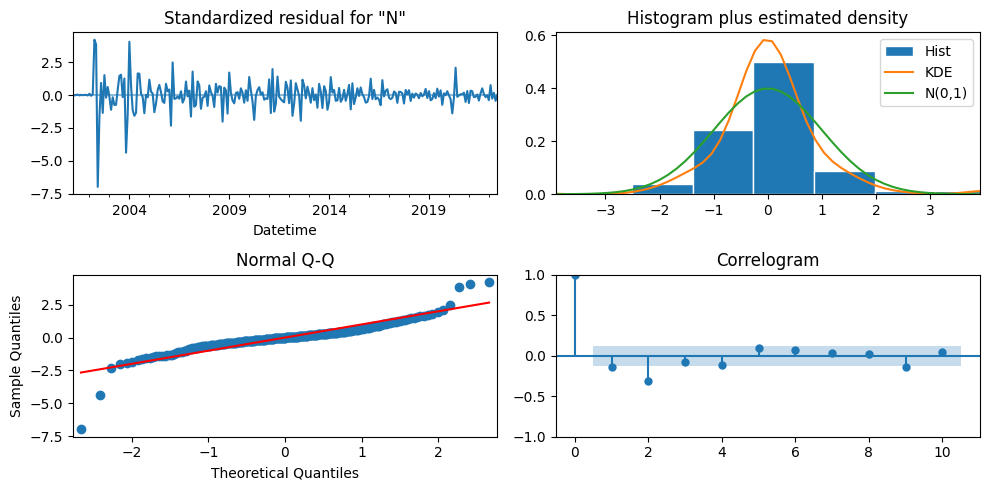

In [146]:
fig=sarima.plot_diagnostics(figsize=(10,5))
fig.tight_layout()
sarima.summary()

correlogram suggests our model missed some details

##### Automodel

In [147]:
auto_model=pm.auto_arima(ts_train,seasonal=True,m=12)
print(auto_model.order)
print(auto_model.seasonal_order)

(0, 0, 0)
(1, 0, 1, 12)


In [148]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                  257
Model:             SARIMAX(1, 0, [1], 12)   Log Likelihood               -1844.755
Date:                    Wed, 08 May 2024   AIC                           3695.510
Time:                            11:28:04   BIC                           3706.157
Sample:                        02-28-2001   HQIC                          3699.792
                             - 06-30-2022                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9052      0.060     15.112      0.000       0.788       1.023
ma.S.L12      -0.7076      0.108     -6.571      0.000      -0.919      -0.497
sigma2      9.886e+04   4407.690     22.428      0.000    9.02e+04    1.07e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):              3600.04
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                             2.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


------------------------------------------------------------
Regression Metrics: Narcotics
------------------------------------------------------------
- MAE = 26.073
- MSE = 1,178.288
- RMSE = 34.326
- R^2 = -1.054
- MAPE = 251.53%


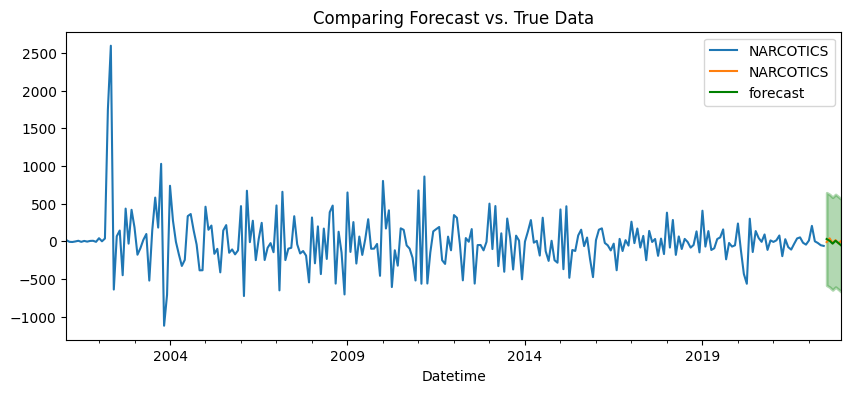

In [149]:
#fit model
auto_model=tsa.ARIMA(ts_train,order=auto_model.order,seasonal_order=auto_model.seasonal_order).fit()
#get forecast
forecast_df = auto_model.get_forecast(steps=len(ts_test)).summary_frame()
plot_forecast(ts_train, ts_test, forecast_df);
regression_metrics_ts(ts_test, forecast_df['mean'], label="Narcotics");

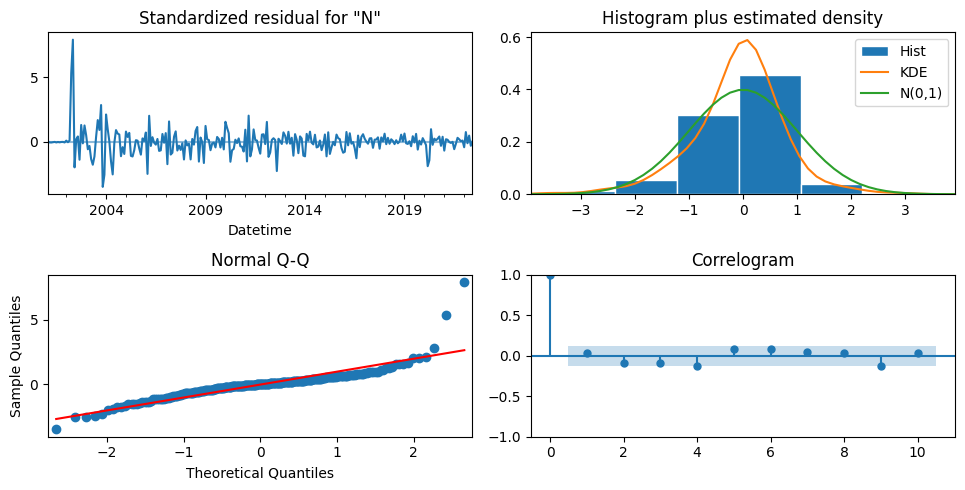

In [150]:
fig=auto_model.plot_diagnostics(figsize=(10,5))
fig.tight_layout()


Better correlogram fit

In [151]:
narc_model=auto_model

###comparison

####Defining models

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


------------------------------------------------------------
Regression Metrics: Theft
------------------------------------------------------------
- MAE = 926.844
- MSE = 1,198,819.837
- RMSE = 1,094.906
- R^2 = -3.288
- MAPE = 19.06%


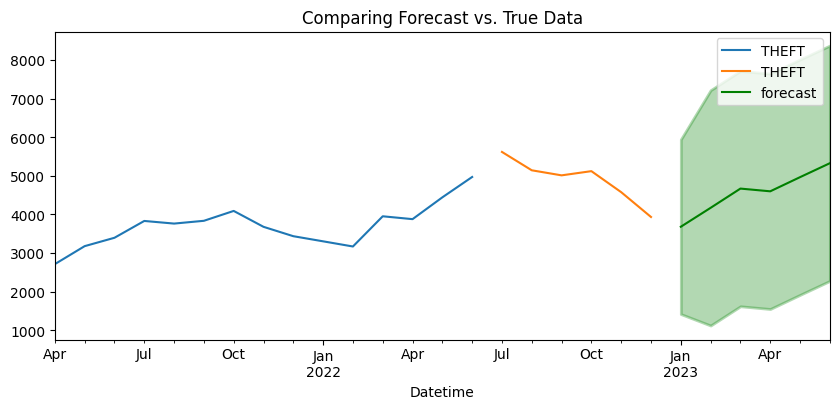

In [130]:

#Theft model
#Train test split
ts_theft_train, ts_theft_test = train_test_split(ts_theft,test_size=n_test_lags)
pdqPDQm = (0,0,1,1,0,1,12)
#fitting model on all available data
theft_model=tsa.ARIMA(ts_theft,order=pdqPDQm[:3],seasonal_order=pdqPDQm[3:]).fit()
#making forecast
theft_forecast=theft_model.get_forecast(steps=len(ts_test)).summary_frame()
#visualising forecast
plot_forecast(ts_theft_train, ts_theft_test,theft_forecast,n_train_lags=15)
regression_metrics_ts(ts_theft_test, theft_forecast['mean'], label="Theft")

------------------------------------------------------------
Regression Metrics: Narcotics
------------------------------------------------------------
- MAE = 420.200
- MSE = 179,873.756
- RMSE = 424.115
- R^2 = -836.055
- MAPE = 138.94%


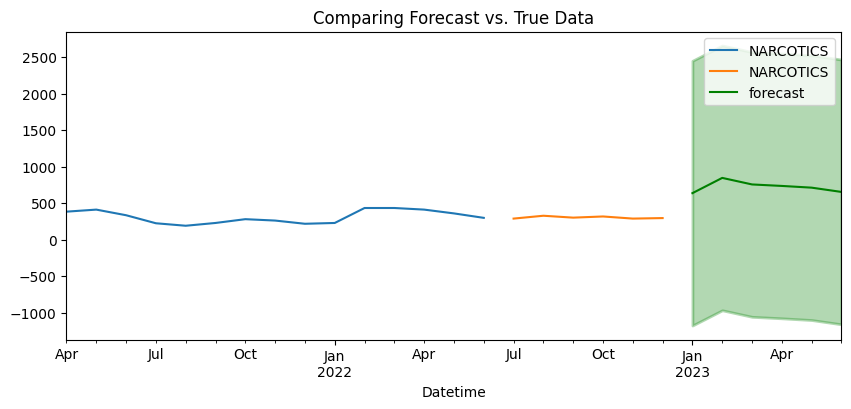

In [131]:
#Narcotics model
#Train test split
ts_narc_train, ts_narc_test = train_test_split(ts_narcotics,test_size=n_test_lags)
pdqPDQm = (0,0,0,1,0,1,12)
#fitting model on all available data
narc_model=tsa.ARIMA(ts_narcotics,order=pdqPDQm[:3],seasonal_order=pdqPDQm[3:]).fit()
#making forecast
narc_forecast=narc_model.get_forecast(steps=len(ts_test)).summary_frame()
#visualising forecast
plot_forecast(ts_narc_train, ts_narc_test,narc_forecast,n_train_lags=15)
regression_metrics_ts(ts_narc_test, narc_forecast['mean'], label="Narcotics")

##Final evaluation

In [136]:
#Theft evaluation
theft_final_fore=theft_forecast['mean'].iloc[-1]
theft_change=theft_forecast["mean"].iloc[-1]-theft_forecast["mean"].iloc[0]
theft_perc_change=(theft_forecast["mean"].iloc[-1]-theft_forecast["mean"].iloc[0])/theft_forecast["mean"].iloc[0]*100
print(f"Theft final monthly count:{theft_final_fore:.2f}")
print(f"Theft change:{theft_change:.2f}")
print(f"Theft change percentage:{theft_perc_change:.2f}")

print("")

#Narcotics evaluation
narc_final_fore=narc_forecast['mean'].iloc[-1]
narc_change=narc_forecast['mean'].iloc[-1] - narc_forecast["mean"].iloc[0]
narc_perc_change=(narc_forecast["mean"].iloc[-1]-narc_forecast["mean"].iloc[0])/narc_forecast["mean"].iloc[0]*100
print(f"Narcotics final monthly count:{narc_final_fore:.2f}")
print(f"Narcotics change:{narc_change:.2f}")
print(f"Narcotics change percentage:{narc_perc_change:.2f}")

Theft final monthly count:5328.75
Theft change:1647.19
Theft change percentage:44.74

Narcotics final monthly count:651.99
Narcotics change:16.52
Narcotics change percentage:2.60


Of the two crimes, **Theft** is forecasted to have:
- the highest monthly count of crimes
- the highest net change
- the highest percent change by the end of the forecast

## Recommendation

More resources should be allocated to Theft compred to Narcotics in the next six months.

Theft is predicted to have more than 8 times the number of criminal counts than Narcotics.

This is further illustrated by the widely varried percentage changes in the 6 month forecasts.
- **Theft** is predicted to increase by **44.74%**
- **Narcotics** are expected to uncrease by **2.60%**